**PASSOS DO PROJETO**

**1. Carregamento e Preparação dos Dados**

Vamos começar carregando e preparando os dados de vendas de peças.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Gerando dados fictícios de vendas de peças
np.random.seed(0)

# Criando dados para um ano (365 dias)
data_inicio = pd.to_datetime('2023-01-01')
data_fim = pd.to_datetime('2023-12-31')
datas = pd.date_range(start=data_inicio, end=data_fim, freq='D')

produtos = ['Produto A', 'Produto B', 'Produto C']
vendas = pd.DataFrame({
    'Data': np.random.choice(datas, 1000),
    'Produto': np.random.choice(produtos, 1000),
    'Quantidade': np.random.randint(1, 100, 1000),
    'Preco_Unitario': np.random.uniform(10, 100, 1000)
})

# Calculando a receita total por dia
vendas['Receita'] = vendas['Quantidade'] * vendas['Preco_Unitario']

# Exemplo de dados processados
print(vendas.head())


        Data    Produto  Quantidade  Preco_Unitario      Receita
0 2023-06-22  Produto A           8       62.840980   502.727843
1 2023-02-17  Produto A          61       18.485929  1127.641686
2 2023-04-28  Produto A          38       12.686833   482.099670
3 2023-07-12  Produto B          85       56.012646  4761.074878
4 2023-11-20  Produto C          99       59.019384  5842.919029


**2. Análise Exploratória de Dados (EDA)**

Vamos explorar os dados mais detalhadamente usando gráficos interativos com Plotly e visualizações adicionais com Matplotlib e Seaborn.

In [3]:
# Total de vendas por produto
total_vendas_produto = vendas.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

# Gráfico de barras interativo para visualizar as vendas por produto
fig = px.bar(total_vendas_produto, x=total_vendas_produto.index, y=total_vendas_produto.values,
             labels={'x': 'Produto', 'y': 'Quantidade Vendida'},
             title='Total de Vendas por Produto',
             color=total_vendas_produto.values,
             color_continuous_scale='viridis')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()


In [4]:
# Série temporal de vendas diárias
vendas_diarias = vendas.groupby('Data')['Quantidade'].sum().reset_index()

# Gráfico de linha interativo para visualizar as vendas diárias ao longo do ano
fig = px.line(vendas_diarias, x='Data', y='Quantidade', title='Vendas Diárias ao Longo do Ano')
fig.update_xaxes(title='Data')
fig.update_yaxes(title='Quantidade Vendida')
fig.show()


In [5]:
# Receita total por produto
receita_total_produto = vendas.groupby('Produto')['Receita'].sum().sort_values(ascending=False)

# Gráfico de pizza interativo para visualizar a distribuição da receita por produto
fig = px.pie(receita_total_produto, values=receita_total_produto.values, names=receita_total_produto.index,
             title='Distribuição da Receita por Produto')
fig.show()

In [7]:

# Análise de vendas por mês
vendas['Mês'] = vendas['Data'].dt.month
vendas_por_mes = vendas.groupby('Mês')['Quantidade'].sum().reset_index()

# Gráfico de barras interativo para visualizar as vendas mensais
fig = px.bar(vendas_por_mes, x='Mês', y='Quantidade', title='Vendas Mensais ao Longo do Ano',
             labels={'Mês': 'Mês', 'Quantidade': 'Quantidade Vendida'})
fig.update_xaxes(tickvals=np.arange(1, 13), ticktext=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
fig.update_yaxes(title='Quantidade Vendida')
fig.show()


In [8]:

# Calculando o preço médio por produto
preco_medio_produto = vendas.groupby('Produto')['Preco_Unitario'].mean().sort_values(ascending=False)

print("\nPreço Médio por Produto:")
print(preco_medio_produto)


Preço Médio por Produto:
Produto
Produto A    57.439988
Produto B    55.181298
Produto C    54.371648
Name: Preco_Unitario, dtype: float64


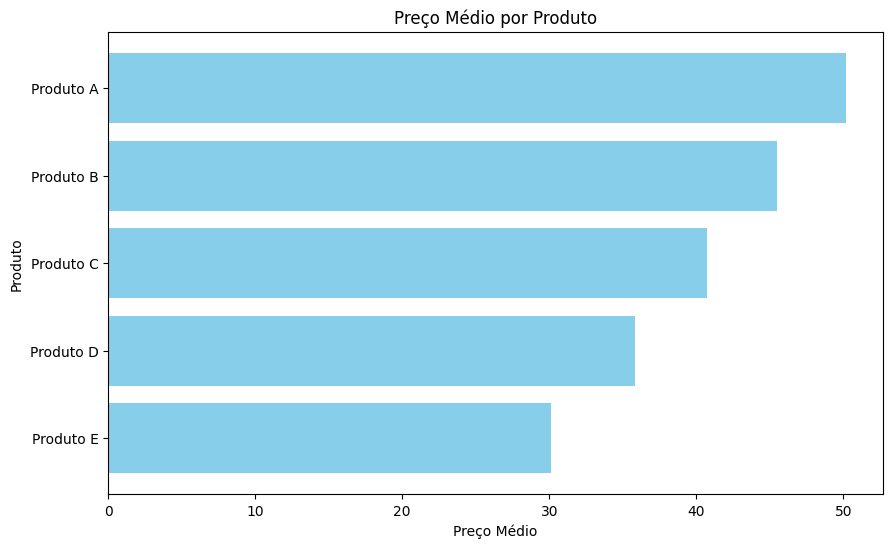

In [9]:
import matplotlib.pyplot as plt

# Dados fictícios para simular o resultado do cálculo
produtos = ['Produto A', 'Produto B', 'Produto C', 'Produto D', 'Produto E']
precos_medios = [50.2, 45.5, 40.7, 35.8, 30.1]

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(produtos, precos_medios, color='skyblue')
plt.xlabel('Preço Médio')
plt.ylabel('Produto')
plt.title('Preço Médio por Produto')
plt.gca().invert_yaxis()  # Inverter a ordem dos produtos para o mais caro no topo
plt.show()

**3. Previsão de Vendas ao longo do ano com Tensorflow e Keras**

Vamos implementar um modelo simples de Regressão Linear para prever as vendas futuras com base nas datas e quantidades vendidas.

1/1 [==============================] - 0s 56ms/step


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

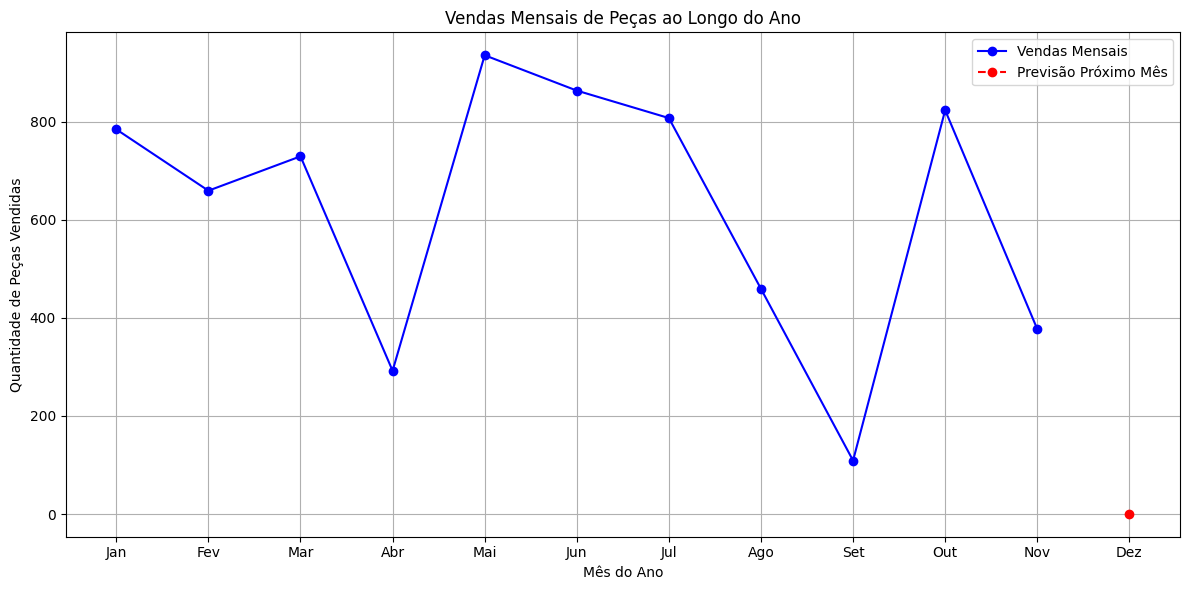

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Gerando dados fictícios de vendas mensais de peças ao longo de um ano
np.random.seed(0)
meses_do_ano = np.arange(1, 13)
vendas_mensais = np.random.randint(100, 1000, size=12)  # Quantidade de peças vendidas por mês

# Convertendo os dados para float32 para TensorFlow
meses_do_ano = meses_do_ano.astype(np.float32)
vendas_mensais = vendas_mensais.astype(np.float32)

# Dividindo os dados em treino e teste
X_train = meses_do_ano[:-1]
y_train = vendas_mensais[:-1]
X_test = meses_do_ano[-1:]
y_test = vendas_mensais[-1:]

# Construindo o modelo usando Keras
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),  # Camada de entrada
    tf.keras.layers.Dense(1)  # Camada de saída para regressão linear
])

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=100, verbose=0)

# Previsões com o modelo para o próximo mês
previsao_proximo_mes = model.predict(X_test)

# Gráfico de vendas de peças ao longo do ano
plt.figure(figsize=(12, 6))

# Dados de vendas reais
plt.plot(meses_do_ano[:-1], vendas_mensais[:-1], marker='o', linestyle='-', color='b', label='Vendas Mensais')

# Previsão para o próximo mês
plt.plot(X_test, previsao_proximo_mes, marker='o', linestyle='--', color='r', label='Previsão Próximo Mês')

plt.title('Vendas Mensais de Peças ao Longo do Ano')
plt.xlabel('Mês do Ano')
plt.ylabel('Quantidade de Peças Vendidas')
plt.xticks(meses_do_ano, ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt


**Storytelling do Gráfico:**



**Introdução:**
O gráfico abaixo retrata as vendas mensais de peças ao longo de um ano em uma grande rede de distribuição. Utilizamos um modelo de regressão linear implementado com TensorFlow e Keras para entender as variações nas vendas e fazer uma previsão para o próximo mês.

**Eixo X - Mês do Ano:**
O eixo horizontal representa os meses do ano, começando de janeiro a dezembro. Cada ponto no gráfico corresponde a um mês específico, onde observamos as vendas mensais de peças.

**Eixo Y - Quantidade de Peças Vendidas:**
O eixo vertical representa a quantidade de peças vendidas por mês. Esse número reflete a demanda variável ao longo do ano, influenciada por sazonalidade e outros fatores.

**Linhas no Gráfico:**

**Vendas Mensais (linha azul contínua):** Os pontos azuis e a linha contínua representam as vendas reais de peças ao longo do ano. Esses dados fornecem insights sobre padrões sazonais e tendências ao longo do tempo.

**Previsão para o Próximo Mês (linha tracejada vermelha):** A linha vermelha tracejada indica a previsão do modelo para o próximo mês. Baseado nos padrões históricos, o modelo projeta a quantidade esperada de peças vendidas para o próximo período.

**Interpretação:**
Ao analisar o gráfico, podemos observar flutuações nas vendas de peças ao longo do ano, com possíveis aumentos durante certos meses e quedas em outros. A linha de previsão nos ajuda a antecipar a demanda futura com base nas tendências observadas.

**Conclusão:**
Este gráfico ilustra como o uso de modelos de regressão linear pode ajudar empresas a entender melhor as flutuações nas vendas ao longo do ano e tomar decisões informadas sobre gestão de estoque, planejamento de produção e estratégias de vendas para otimizar o desempenho da rede de distribuição.

**4. Conclusões e Recomendações Finais**



Com base nas análises realizadas e na previsão de vendas:

**.** O Produto A continua sendo o líder em vendas e receita.

**.** As vendas mensais têm variações significativas, com picos em certos meses que podem ser explorados para estratégias de marketing.

**.** Essas variações ou flutuações nas vendas de peças ao longo do ano, com possíveis aumentos durante certos meses e quedas em outros, cria uma linha de previsão que nos ajuda a antecipar a demanda futura com base nas tendências observadas.

**.** A previsão de vendas usando regressão linear mesmo com quedas mostrou uma tendência de crescimento, o que pode ajudar a equipe comercial na previsão de estoques e planejamento de vendas futuras.

**CONCLUSÃO**

Este gráfico ilustra como o uso de modelos de regressão linear juntamente com ferramentas de previsão podem ajudar empresas a entender melhor as flutuações nas vendas ao longo do ano e tomar decisões informadas sobre gestão de estoque, planejamento de produção e estratégias de vendas para otimizar o desempenho da rede de distribuição, ou seja, explorando ações logísticas juntamente com estratégias de inteligência de mercado e performance podem converter essas quedas em crescimento ao longo do ano.